# Show me the Bumps
OR
"How I learned to stop worrying and Love The Bumps"

Here we replicate the process originally done in Matlab, that demonstrates how one would visualize the bumps present in the 'bump' scan taken during Leica tests in 2016.


In [1]:
%matplotlib notebook
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

# here we import code that contains all functions we need for this processing
from parabolas import *


## Load the first of our scan pairs

<IPython.core.display.Javascript object>


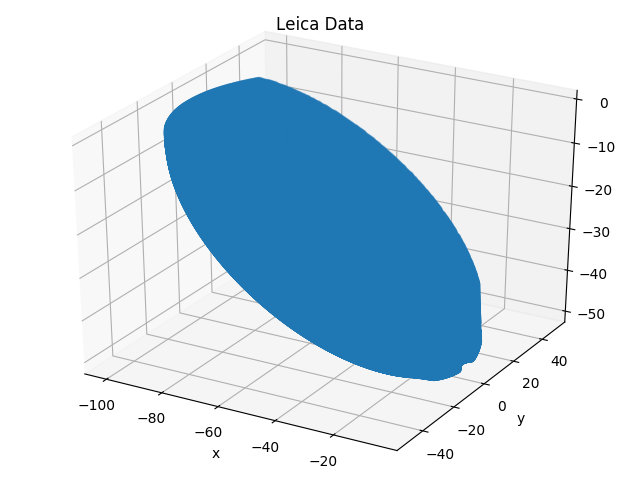

In [5]:
# we know ahead of time that this is the dimension we used for this smoothing
N = 512

# the file that holds the smoothed bump scan data
fn = "data/BumpScan.csv.smoothed.sig.001.all.npz"

orgData, cleanData = loadLeicaData(fn)
x0, y0, z0 = orgData
x, y, z = cleanData
scatter3dPlot(x, y, z, "Leica Data")

## Fit a parabola to this data

In [6]:
# Here's our initial guess to the parabola coefficients: 
# the focus is the only non-zero guess
f = 60.
v1x = v1y = v2 = 0
xTheta = 0.
yTheta = 0.
guess = [f, v1x, v1y, v2, xTheta, yTheta]
r = fitLeicaData(x, y, z, guess)

In [7]:
# how does our fit seem?
print "fitted coefficients: ", r.x
print "success?", r.success
print "message:", r.message

fitted coefficients:  [ 5.74057936e+01  2.87607672e-01 -2.22277309e+00 -4.91783029e+01
  1.43187879e-03 -3.30739821e-02]
success? True
message: `xtol` termination condition is satisfied.


### Our focus and rotation looks close to the inital guess
Not sure what to say about the verticies

## Use the fitted coefficients to create a data set for the fit
and plot it

<IPython.core.display.Javascript object>


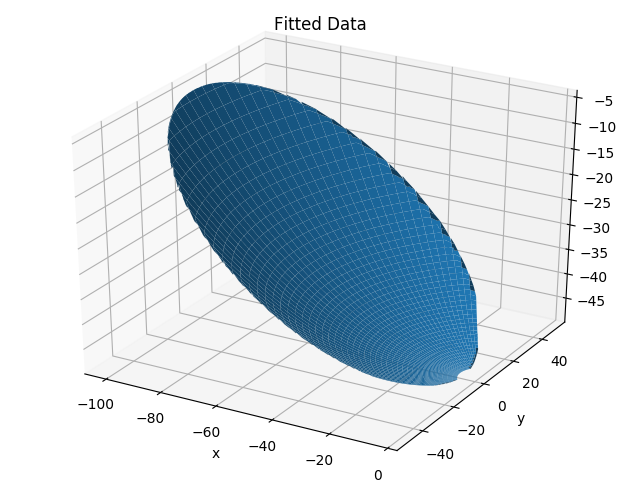

In [8]:
c = r.x
# make sure we use the original data (NOT filtered for NaNs)
newX, newY, newZ = newParabola(x0, y0, z0, c[0], c[1], c[2], c[3], c[4], c[5])
newX.shape = newY.shape = newZ.shape = (N, N)
surface3dPlot(newX, newY, newZ, "Fitted Data")

## Rotate the original data by the fitted rotation

<IPython.core.display.Javascript object>


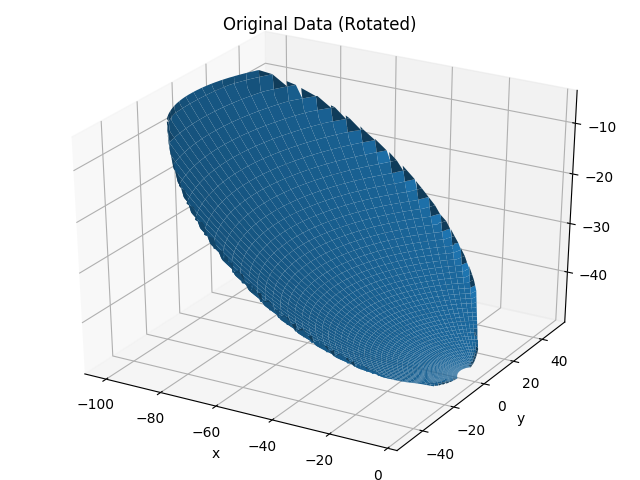

In [9]:
xThetaFit = r.x[4]
yThetaFit = r.x[5]
xrr, yrr, zrr = rotateData(x0, y0, z0, xThetaFit, yThetaFit)
xrr.shape = yrr.shape = zrr.shape = (N, N)
surface3dPlot(xrr, yrr, zrr, "Original Data (Rotated)")

## Find the differnce between the fitted data and rotated original data

In [10]:
bumpDiff = zrr - newZ

<IPython.core.display.Javascript object>


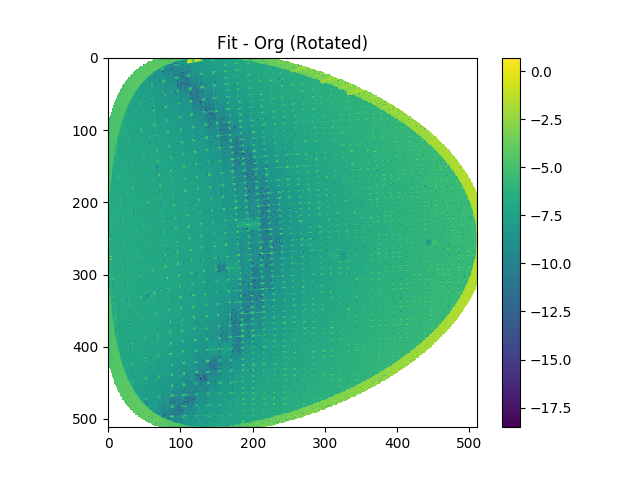

In [11]:
# let's take a look at it!
diff = np.log(np.abs(np.diff(bumpDiff)))
imagePlot(diff, "Fit - Org (Rotated)")

# by using the diff command above, we can see the space between the panels!

## Do it all over again for the reference scan
But take advantage of our parabolas module

<IPython.core.display.Javascript object>


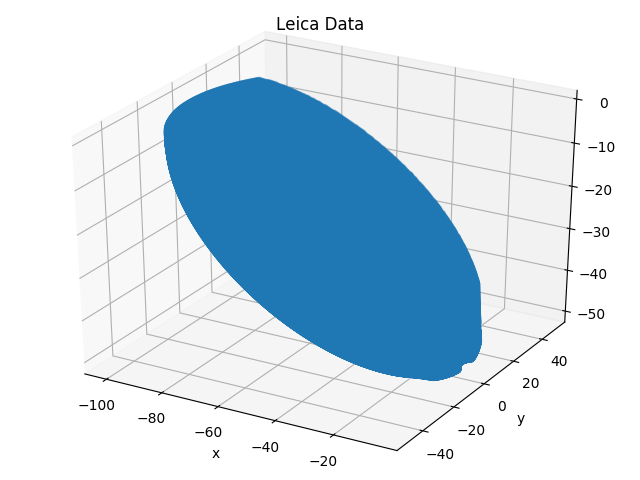

cleaned data fitted with coefficients:  [ 5.74103781e+01  2.83446831e-01 -2.22812997e+00 -4.91790425e+01
  1.52363084e-03 -3.31406173e-02]


<IPython.core.display.Javascript object>


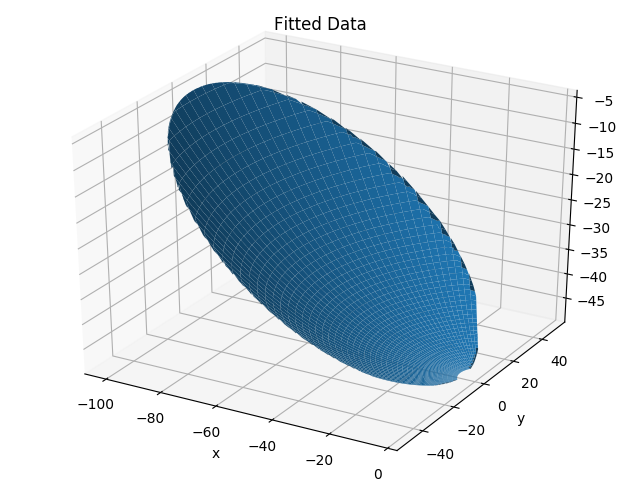

<IPython.core.display.Javascript object>


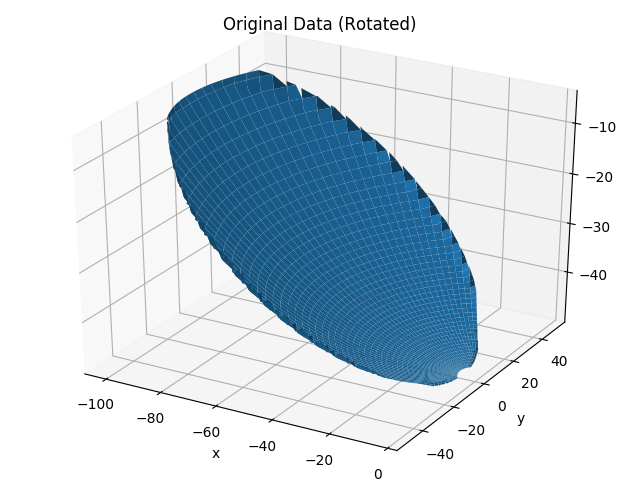

<IPython.core.display.Javascript object>


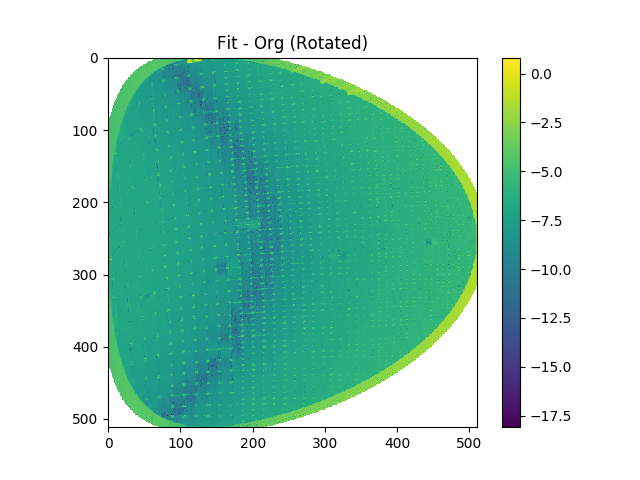

In [12]:
fn = "data/Baseline_STA10_HIGH_METERS.csv.smoothed.sig.001.all.npz"
refDiff = fitLeicaScan(fn)


## Now Show Me The Bumps!
Since, theoritically, the only difference between the ref and bump scans was the 'bumps' we placed on the active surface for the bump scan, the difference between the two processed scans above should show us these bumps.

<IPython.core.display.Javascript object>


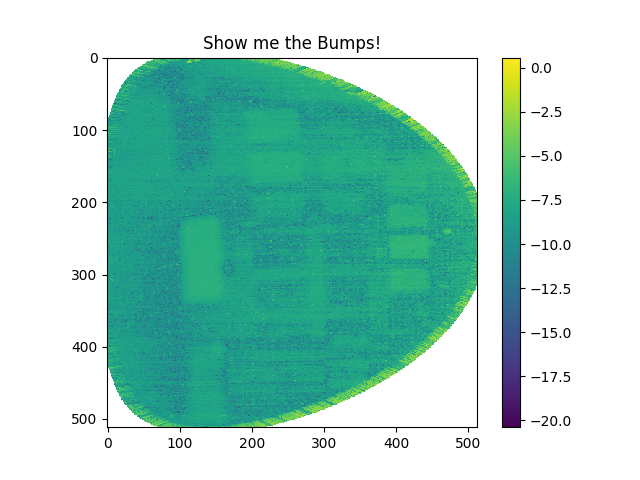

In [13]:
bumps = bumpDiff - refDiff
bumpDiff = np.log(np.abs(bumps))
imagePlot(bumpDiff, "Show me the Bumps!")

<IPython.core.display.Javascript object>


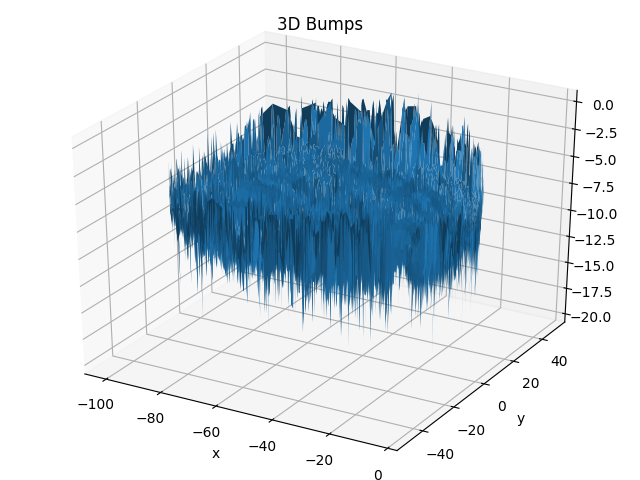

In [14]:
surface3dPlot(xrr, yrr, bumpDiff, "3D Bumps")

## Compare to Fred's Bumps

Here's the specs for where the bumps should be:

![specs](bumpSpecs.gif)

And here's one of Fred's attempts to find those bumps:

![bumps](fredsBumps1.gif)